This notebook demonstrates how the safemotions package can be used to generate torque-limited and collision-free robot trajectories without exceeding limits on the position, velocity, acceleration and jerk of each robot joint.
Note: Colab does not provide a display server, however, it is possible to render videos of the generated movements. 
When running the package on your local machine, you can add the command line argument "--use_gui" for instantaneous visualization. 

Note: The following examples generate random movements. This corresponds to the behavior of a neural network at the beginning of the training phase.
A [second notebook](https://colab.research.google.com/github/translearn/notebooks/blob/main/safemotions_trained_networks_demo.ipynb) is provided to demonstrate the performance of pretrained networks.   

Examples:
1.   [One industrial robot](#t1), collision and torque limit prevention
2.   [Two industrial robots](#t2), collision and torque limit prevention
3.   [Three industrial robots](#t3), collision and torque limit prevention
4.   [Humanoid robot ARMAR 6](#t4), collision prevention
5.   [Four-armed humanoid robot ARMAR 6x4](#t5), collision prevention

When a robot link flashes  <font color='#ff5400'>orange</font>, an alternative safe behavior is executed to avoid a torque limit violation. <font color='#75052d'>Red</font> and <font color='#0000aa'>blue</font> flashing indicates that an alternative safe behavior is performed to prevent a collision with another robot link and a static obstacle, respectively.


In [ ]:
# First step: install the safemotions package via pip
! pip install pybullet==3.2.1
! pip install safemotions
! pip install armar
! pip install gym==0.18.3
! pip install gputil
%matplotlib inline
# Use a renderer with hardware acceleration provided that a GPU is available. 
import GPUtil
try:
  renderer = "egl" if len(GPUtil.getGPUs()) > 0 else "cpu"
except:
  renderer = "cpu"
if renderer == "cpu":
  print("Using CPU renderer.")
else:
  print("Using GPU renderer.")

Using GPU renderer.




---

<a name="t1"></a>
1.   One industrial robot, collision and torque limit prevention
<br>
Note: Since the virtual walls around the robot are transparent, only the GPU-based renderer can be used for this example. <br>
 



INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400.]
INFO:root:Torque limits: [105.6 105.6  66.   66.   66.   24.   24. ]
INFO:root:Trajectory time step: 0.1
INFO:root:Observation size: 28
INFO:root:Joint 1 (min/max) Actual Torque: -0.30705022604510357 / 0.3492859854742971; Jerk: -0.8375338542765952 / 0.7841749357911014; Acc: -0.9970380050476135 / 0.9607158121941761; Vel: -0.8735060873584125 / 0.8402124575630112; Pos: 0.4454655010458808 / 0.9883225632550512
INFO:root:Joint 2 (min/max) Actual Torque: -0.9330410372042153 / 0.9015013766032012; Jerk: -0.8712195055298103 / 0.9143409482591911; Acc: -1.00000000

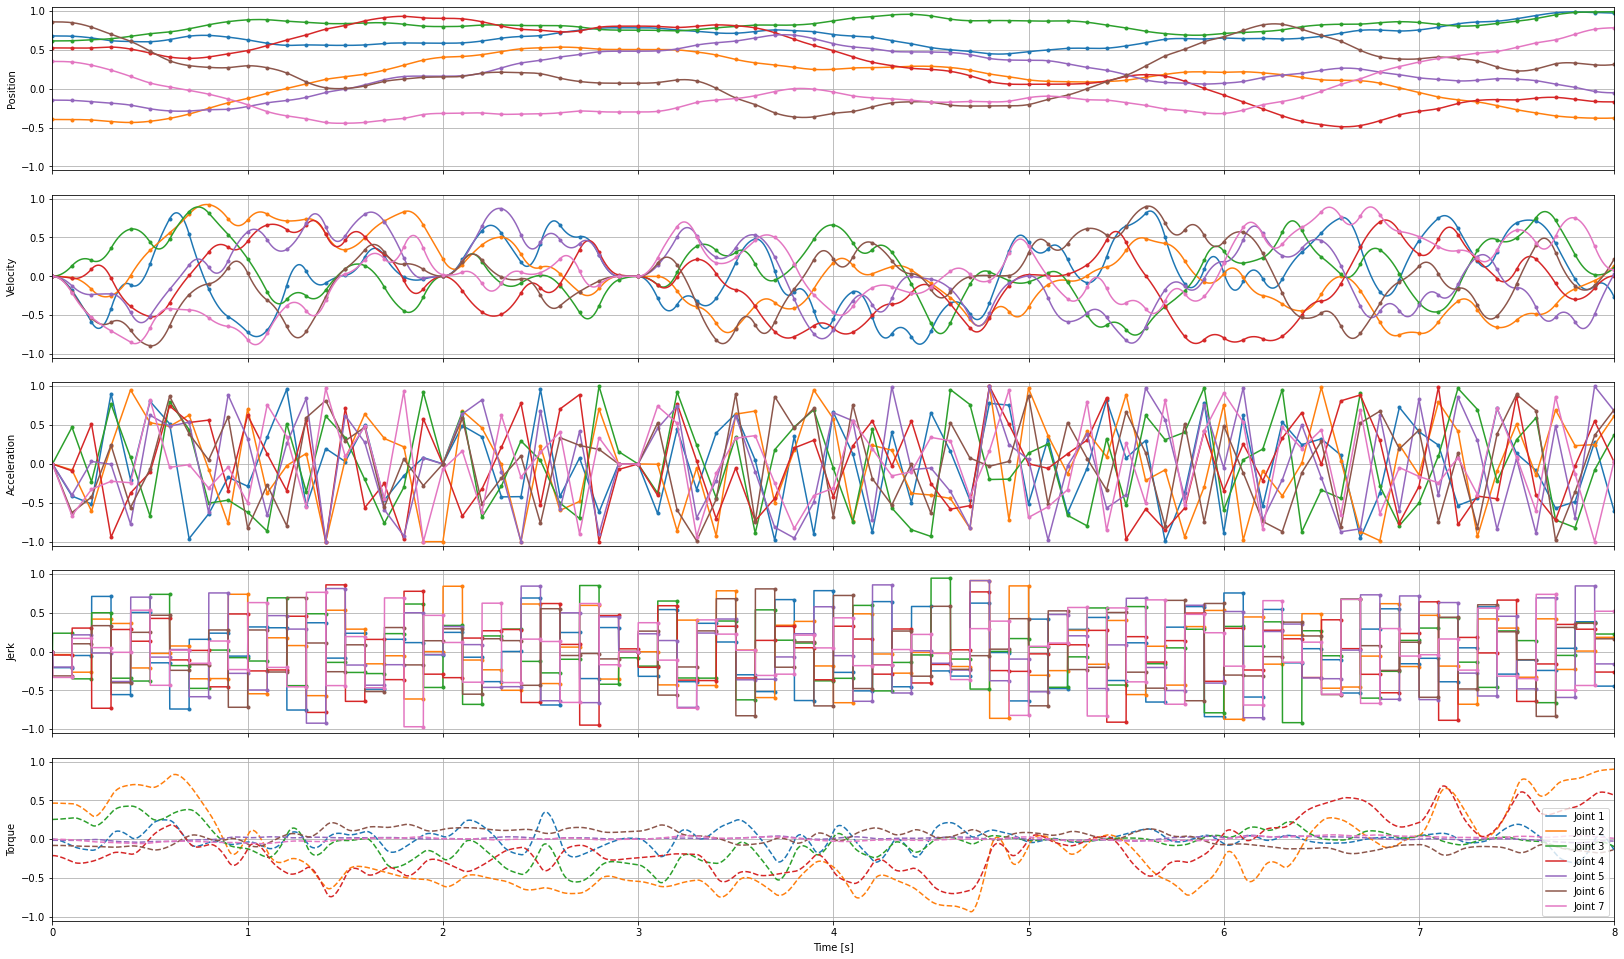

INFO:root:Episode 1 took 15.560863018035889 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -20.626758560517118
INFO:root:Computed 1 episode(s) in 16.05878520011902 seconds.
INFO:root:Mean computation time: 15.560863018035889 seconds, Max computation time: 15.560863018035889 seconds.


In [ ]:
import os, safemotions
from IPython.display import HTML, display
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
video_height = 720
video_frame_rate = 24
video_width = int(16/9 * video_height)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  print("This example requires a GPU-based renderer as the walls around the robot are transparent. Unfortunately, transparency is not supported by the cpu renderer. Try to run the other examples instead.")
else:
  %run -G "$random_agent" --check_braking_trajectory_collisions --check_braking_trajectory_torque_limits --robot_scene=0 --online_trajectory_duration=8.0 --torque_limit_factor=0.6 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --fixed_video_filename --video_dir="/content"
  video_filename = os.path.join("/content", "episode_1.mp4")
  video_file = open(video_filename,'rb').read()
  url = "data:video/mp4;base64," + b64encode(video_file).decode()
  display(HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url)))



---


<a name="t2"></a>
2.   Two industrial robots, collision and torque limit prevention


INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095
 3.14159265 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20.  15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400. 300. 150. 200. 250. 300. 400. 400.]
INFO:root:Torque limits: [176. 176. 110. 110. 110.  40.  40. 176. 176. 110. 110. 110.  40.  40.]
INFO:root:Trajectory time step: 0.1
INFO:root:Observation size: 56
INFO:root:Joint 1 (min/max) Actual Torque: -0.49115395056194155 / 0.307994777041685

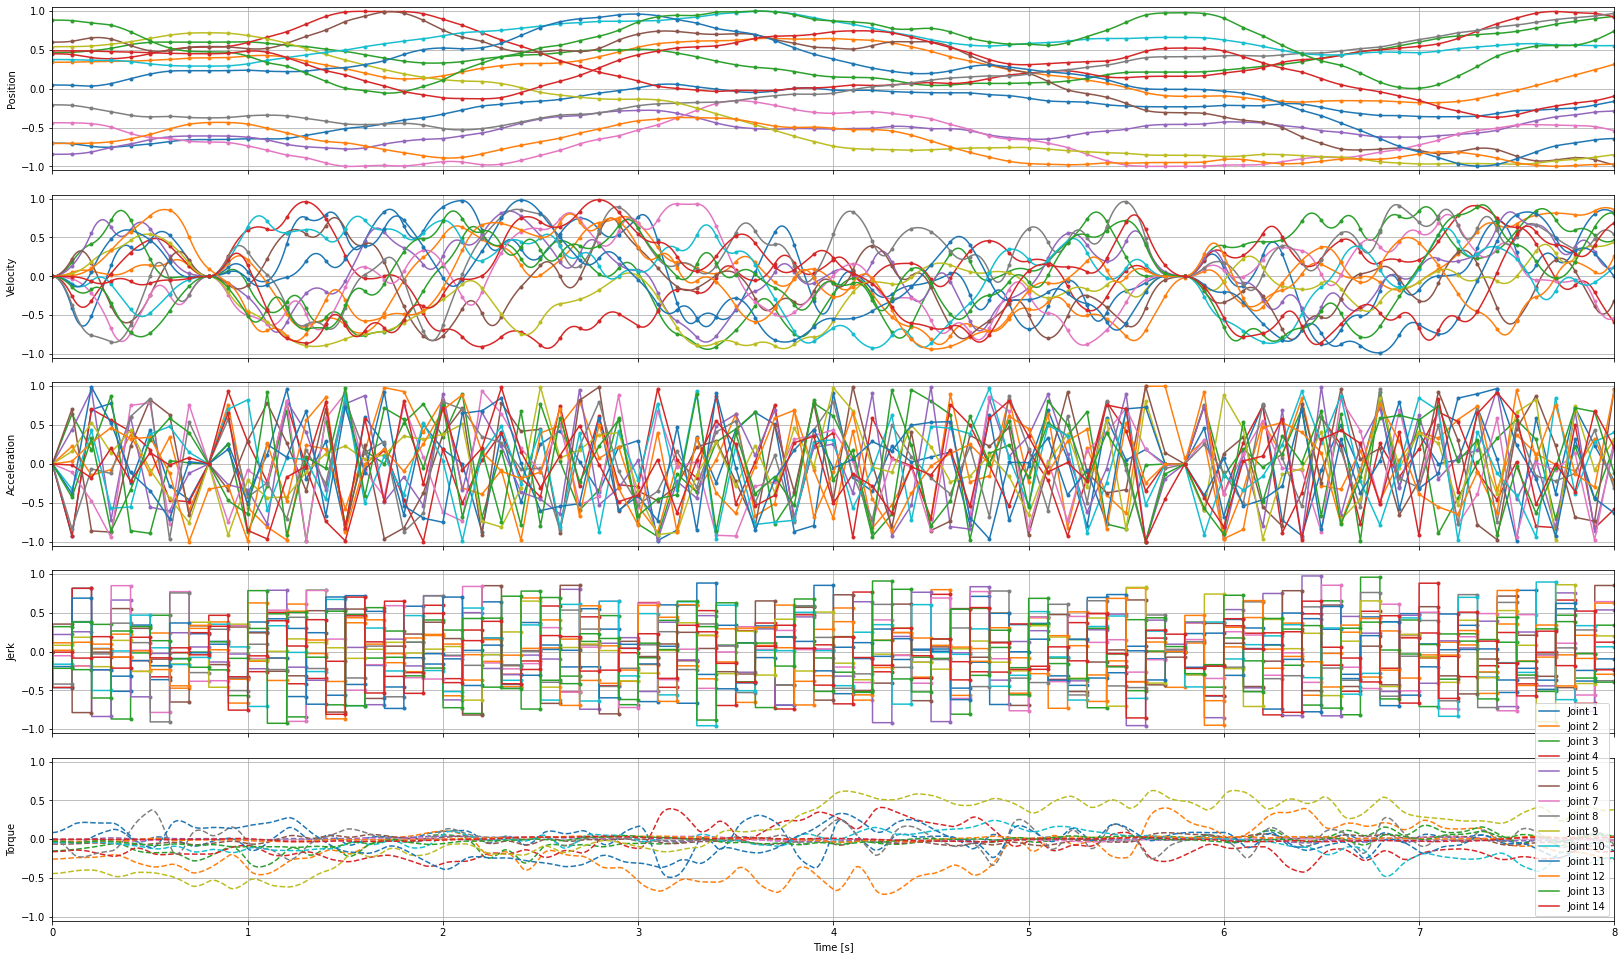

INFO:root:Episode 1 took 19.342228412628174 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -25.906687792539152
INFO:root:Computed 1 episode(s) in 19.892937183380127 seconds.
INFO:root:Mean computation time: 19.342228412628174 seconds, Max computation time: 19.342228412628174 seconds.


In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_collisions --check_braking_trajectory_torque_limits --robot_scene=1 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --fixed_video_filename --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

---


<a name="t3"></a>
3.   Three industrial robots, collision and torque limit prevention

INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619 2.93205973 2.0593951  2.93205973 2.0593951
 2.93205973 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -2.93205973 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095
 3.14159265 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803
 2.44346095 3.14159265 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20.  15.   7.5 10.  12.5 15.  20.  20.
 15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400. 300. 150.

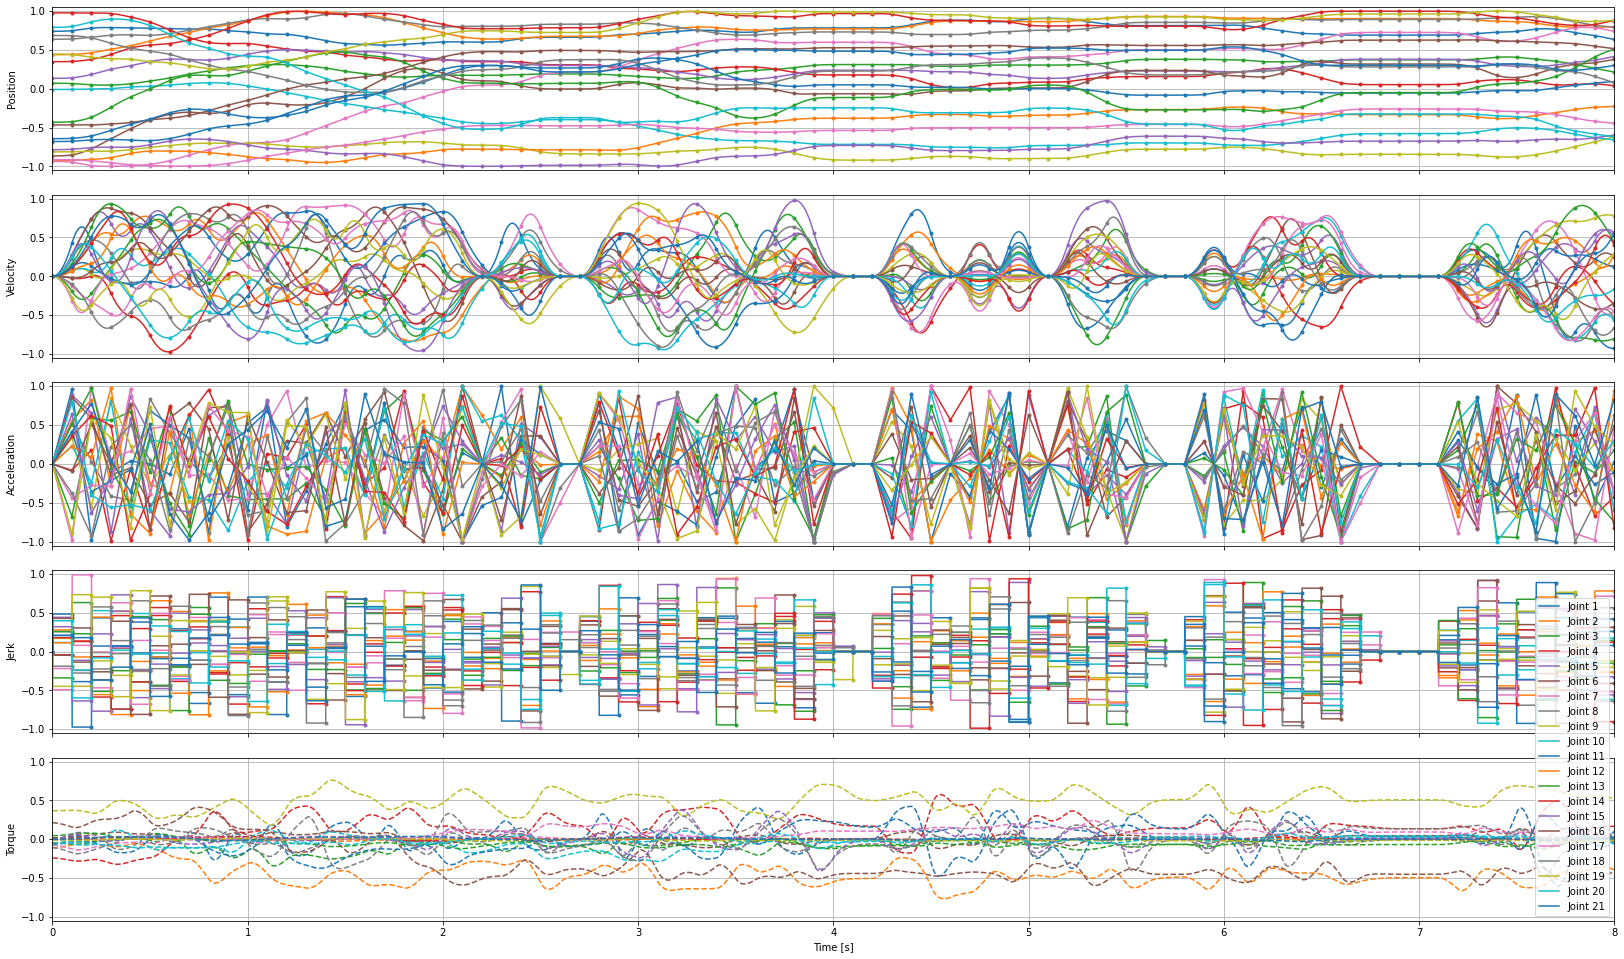

INFO:root:Episode 1 took 21.27973508834839 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -48.58107236940801
INFO:root:Computed 1 episode(s) in 21.82555866241455 seconds.
INFO:root:Mean computation time: 21.27973508834839 seconds, Max computation time: 21.27973508834839 seconds.


In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_collisions --check_braking_trajectory_torque_limits --robot_scene=2 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --fixed_video_filename --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

---


<a name="t4"></a>
4.   Humanoid robot ARMAR 6, collision prevention

In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_collisions --robot_scene=3 --obstacle_scene=5 --online_trajectory_duration=8.0 --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=9 --video_height=$video_height --fixed_video_filename --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

INFO:root:Pos upper limits: [0.         1.3962634  1.57079633 3.1        1.57079633 2.51
 1.57079633 0.64       1.52       1.3962634  1.57079633 3.1
 1.57079633 2.51       1.57079633 0.64       1.52      ]
INFO:root:Pos lower limits: [-0.365      -1.3962634  -1.57079633 -0.24       -1.57079633  0.
 -1.57079633 -0.64       -1.52       -1.3962634  -1.57079633 -0.24
 -1.57079633  0.         -1.57079633 -0.64       -1.52      ]
INFO:root:Vel limits: [0.15       1.71042267 1.71042267 1.71042267 1.71042267 1.71042267
 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267
 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267]
INFO:root:Acc limits: [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
INFO:root:Jerk limits: [300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
 300. 300. 300.]
INFO:root:Torque limits: [1000.  240.  200.  200.  200.  200.  200.  200.  200.  240.  200.  200.
  200.  200.  200.  200.  200.]
INFO:root:Trajectory time 

---


<a name="t5"></a>
5.   Four-armed humanoid robot ARMAR 6x4, collision prevention

In [ ]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_collisions --robot_scene=5 --obstacle_scene=5 --online_trajectory_duration=8.0 --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=9 --video_height=$video_height --fixed_video_filename --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

INFO:root:Pos upper limits: [0.         1.3962634  1.57079633 3.1        1.57079633 2.51
 1.57079633 0.64       1.52       1.3962634  1.57079633 3.1
 1.57079633 2.51       1.57079633 0.64       1.52       1.3962634
 1.57079633 3.1        1.57079633 2.51       1.57079633 0.64
 1.52       1.3962634  1.57079633 3.1        1.57079633 2.51
 1.57079633 0.64       1.52      ]
INFO:root:Pos lower limits: [-0.335      -1.3962634  -1.57079633 -0.24       -1.57079633  0.
 -1.57079633 -0.64       -1.52       -1.3962634  -1.57079633 -0.24
 -1.57079633  0.         -1.57079633 -0.64       -1.52       -1.3962634
 -1.57079633 -0.24       -1.57079633  0.         -1.57079633 -0.64
 -1.52       -1.3962634  -1.57079633 -0.24       -1.57079633  0.
 -1.57079633 -0.64       -1.52      ]
INFO:root:Vel limits: [0.15       1.71042267 1.71042267 1.71042267 1.71042267 1.71042267
 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267
 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267 1.71042267
 1.